In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import matplotlib.tri as tri
import matplotlib as mpl

import os
path = os.path.abspath(os.getcwd())
os.chdir("../..")
parent_path = os.path.abspath(os.getcwd())

plt.rcParams['text.usetex'] = True

In [2]:
# MH-PINN

with open(path + '\\hydra_sine_log_dict.pickle', 'rb') as handle:
    hydra_sine = pickle.load(handle)
    
with open(path + '\\hydra_sine_reg_log_dict.pickle', 'rb') as handle:
    hydra_sine_reg = pickle.load(handle)
    
with open(path + '\\hydra_tanh_log_dict.pickle', 'rb') as handle:
    hydra_tanh = pickle.load(handle)
    
with open(path + '\\hydra_tanh_reg_log_dict.pickle', 'rb') as handle:
    hydra_tanh_reg = pickle.load(handle)
    
# PI-DON

with open(path + '\\don_sine_log_dict.pickle', 'rb') as handle:
    don_sine = pickle.load(handle)
    
with open(path + '\\don_sine_reg_log_dict.pickle', 'rb') as handle:
    don_sine_reg = pickle.load(handle)
    
with open(path + '\\don_tanh_log_dict.pickle', 'rb') as handle:
    don_tanh = pickle.load(handle)
    
with open(path + '\\don_tanh_reg_log_dict.pickle', 'rb') as handle:
    don_tanh_reg = pickle.load(handle)

In [3]:
log_ls = [hydra_sine['knw_log'], hydra_sine_reg['knw_log'], hydra_tanh['knw_log'], hydra_tanh_reg['knw_log'], don_sine['knw_log'], don_sine_reg['knw_log'], don_tanh['knw_log'], don_tanh_reg['knw_log']]

In [4]:
solution_minmax = []
error_minmax = []
for i in range(8):
    solution_minmax.append(log_ls[i][-1][1].detach().numpy())
    error_minmax.append(abs(log_ls[i][-1][1].detach().numpy()-log_ls[i][-1][2].detach().numpy()))
sol_min = np.array(solution_minmax).flatten().min()
sol_max = np.array(solution_minmax).flatten().max()
err_min = np.array(error_minmax).flatten().min()
err_max = np.array(error_minmax).flatten().max()

In [10]:
def plot_pair(i, log):
    x = log[-1][0]; u_c = log[-1][1]; u_W1 = log[-1][2]
    y = x
    X, Y = np.meshgrid(x,y)
    triang = tri.Triangulation(X.flatten(), Y.flatten())
    mpl.rc('axes',edgecolor='k', linewidth = 2)
    plt.subplot(4, 4, 1+i*2)
    mpl.rc('axes',edgecolor='k')
    plt.tricontourf(triang, u_c.reshape(x.shape[0],y.shape[0]).detach().numpy().flatten(), 100, cmap='jet', vmin = sol_min, vmax = sol_max)
    #plt.colorbar()
    if i%2 == 0:
        plt.ylabel('y', fontsize = 25); plt.yticks(fontsize=20)
    else:
        plt.ylabel('', fontsize = 20); plt.yticks([])
    if i == 6 or i == 7:
        plt.xlabel('x', fontsize = 25); plt.xticks(fontsize=20)
    else:
        plt.xlabel('', fontsize = 20); plt.xticks([])

    mpl.rc('axes',edgecolor='r', linewidth=2)
    plt.subplot(4, 4, 2+i*2)
    plt.tricontourf(triang, abs(u_W1.reshape(x.shape[0],y.shape[0]).detach().numpy().flatten()-u_c.reshape(x.shape[0],y.shape[0]).detach().numpy().flatten()), 100, cmap='jet', vmin = err_min, vmax = err_max)
    #plt.colorbar()
    plt.ylabel('', fontsize = 20); plt.yticks([])
    if i == 6 or i == 7:
        plt.xlabel('x', fontsize = 25); plt.xticks(fontsize=20)
    else:
        plt.xlabel('', fontsize = 20); plt.xticks([])

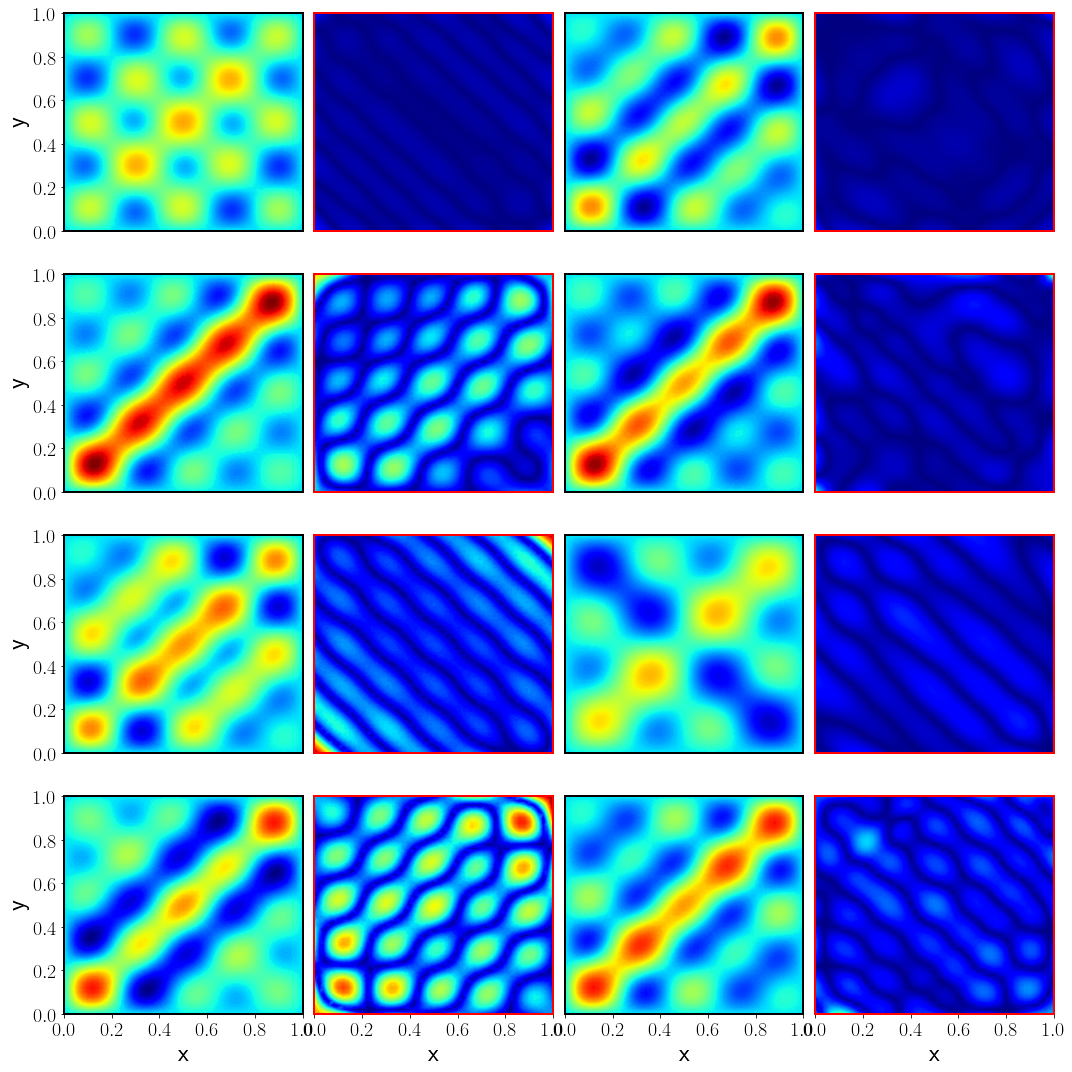

In [13]:
plt.figure(figsize=(15,15))
for i in range(8):
    plot_pair(i,log_ls[i])

plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace = 0.2)
plt.savefig(path + 'compPlot_allencahn.png', dpi = 300, bbox_inches='tight')
plt.show()

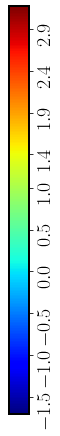

In [9]:
mpl.rc('axes',edgecolor='k', linewidth = 2)
fig, ax = plt.subplots(1, 1, figsize = (0.5,7.5))
ticks = np.around(np.linspace(sol_min,sol_max,100),1)
fraction = 1  # .05

norm = mpl.colors.Normalize(vmin = sol_min, vmax = sol_max)
cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='jet'),
            ax=ax, pad=.05, fraction=fraction, ticks = ticks.tolist())
cbar.ax.locator_params(nbins=10)
cbar.ax.tick_params(labelsize=20, rotation=90)
cbar.update_ticks()
ax.axis('off')
plt.savefig(path + 'compPlot_cbar_sol.png', dpi = 300, bbox_inches='tight')
plt.show()

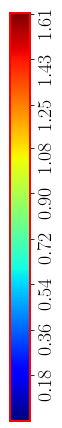

In [8]:
mpl.rc('axes',edgecolor='r', linewidth = 2)
fig, ax = plt.subplots(1, 1, figsize = (1,7.5))
ticks = np.around(np.linspace(err_min,err_max,10),2)
fraction = 1  # .05

norm = mpl.colors.Normalize(vmin = err_min, vmax = err_max)
cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='jet'),
            ax=ax, pad=.05, fraction=fraction, ticks = ticks.tolist())
cbar.ax.locator_params(nbins=10)
cbar.ax.tick_params(labelsize=20, rotation=90)
cbar.update_ticks()
ax.axis('off')
plt.savefig(path + 'compPlot_cbar_err.png', dpi = 300, bbox_inches='tight')
plt.show()